In [2]:
#Create
#a linear model that quantitatively relates house prices with area.
#b.Show the relationship between the sale prices and area using a graph.
#c.If the area values are 7300,6800,5300,8400 find sale prices.
#d.Print the mean squared error value
import pandas as pd
import numpy as np

In [3]:
house=pd.read_csv("D:\SEM 4\Housing.csv")

In [4]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960.0,4,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960.0,3,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500.0,4,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420.0,4,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [5]:
house.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000.0,3000.0,2,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150.0,2400.0,3,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000.0,3620.0,2,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000.0,2910.0,3,1.0,1.0,no,no,no,no,no,0.0,no,furnished
544,1750000.0,3850.0,3,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished


In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             540 non-null    float64
 1   area              541 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         544 non-null    float64
 4   stories           544 non-null    float64
 5   mainroad          544 non-null    float64
 6   guestroom         543 non-null    float64
 7   basement          544 non-null    float64
 8   hotwaterheating   545 non-null    float64
 9   airconditioning   545 non-null    float64
 10  parking           544 non-null    float64
 11  prefarea          545 non-null    float64
 12  furnishingstatus  545 non-null    float64
dtypes: float64(13)
memory usage: 55.5 KB


In [14]:
house.isnull().sum()

price               5
area                4
bedrooms            0
bathrooms           1
stories             1
mainroad            1
guestroom           2
basement            1
hotwaterheating     0
airconditioning     0
parking             1
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
house['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [7]:
house['mainroad'] = house['mainroad'].map({'yes': 1, 'no': 0})
house['guestroom'] = house['guestroom'].map({'yes': 1, 'no': 0})
house['basement'] = house['basement'].map({'yes': 1, 'no': 0})
house['hotwaterheating'] = house['hotwaterheating'].map({'yes': 1, 'no': 0})
house['airconditioning'] = house['airconditioning'].map({'yes': 1, 'no': 0})
house['prefarea'] = house['prefarea'].map({'yes': 1, 'no': 0})
house['furnishingstatus']=house['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})

In [15]:
house['price'].fillna(house['price'].mean(),inplace=True)
house['area'].fillna(house['area'].mean(),inplace=True)
house['bathrooms'].fillna(house['bathrooms'].mean(),inplace=True)
house['stories'].fillna(house['stories'].mean(),inplace=True)
house['mainroad'].fillna(house['mainroad'].mean(),inplace=True)
house['guestroom'].fillna(house['guestroom'].mean(),inplace=True)
house['basement'].fillna(house['basement'].mean(),inplace=True)
house['parking'].fillna(house['parking'].mean(),inplace=True)

In [16]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [19]:
#normalzing
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                                                                          
house = house.apply(normalize)

In [20]:
house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.739996,0.157433,0.206972,0.238358,0.398284,0.141544,-0.176796,-0.351103,-0.045872,0.684404,0.436275,0.765138,-0.534862
1,0.649087,0.263275,0.206972,0.905025,0.731618,0.141544,-0.176796,-0.351103,-0.045872,0.684404,0.769608,-0.234862,-0.534862
2,0.649087,0.332003,0.006972,0.238358,0.064951,0.141544,-0.176796,0.648897,-0.045872,-0.315596,0.436275,0.765138,-0.034862
3,0.646056,0.162931,0.206972,0.238358,0.064951,0.141544,-0.176796,0.648897,-0.045872,0.684404,0.769608,0.765138,-0.534862
4,0.576359,0.157433,0.206972,-0.094975,0.064951,0.141544,0.823204,0.648897,-0.045872,0.684404,0.436275,-0.234862,-0.534862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.253944,-0.146347,-0.193028,-0.094975,-0.268382,0.141544,-0.176796,0.648897,-0.045872,-0.315596,0.436275,-0.234862,0.465138
541,-0.258520,-0.187585,0.006972,-0.094975,-0.268382,-0.858456,-0.176796,-0.351103,-0.045872,-0.315596,-0.230392,-0.234862,-0.034862
542,-0.260004,-0.103736,-0.193028,-0.094975,-0.268382,0.141544,-0.176796,-0.351103,-0.045872,-0.315596,-0.230392,-0.234862,0.465138
543,-0.260004,-0.152533,0.006972,-0.094975,-0.268382,-0.858456,-0.176796,-0.351103,-0.045872,-0.315596,-0.230392,-0.234862,-0.534862


In [18]:
#taking feature value and traget value
X = house[['area']]
Y=house[['price']]

In [21]:
#spliting and traing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [22]:
len(x_train)

408

In [23]:
len(y_train)

408

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = reg.predict(x_test)

In [28]:
y_pred

array([[-0.04181797],
       [ 0.19739052],
       [-0.06480241],
       [ 0.34976888],
       [-0.05628965],
       [ 0.05820693],
       [-0.04820254],
       [-0.06395114],
       [-0.0625891 ],
       [ 0.17100097],
       [ 0.04330961],
       [-0.04352052],
       [-0.06522805],
       [ 0.04586344],
       [ 0.04267115],
       [-0.10864311],
       [-0.00351056],
       [ 0.04416088],
       [-0.08012538],
       [-0.02053607],
       [ 0.13482175],
       [ 0.06246331],
       [ 0.00074582],
       [-0.13971468],
       [ 0.0611864 ],
       [-0.07799719],
       [ 0.0858734 ],
       [ 0.0296892 ],
       [-0.07161262],
       [ 0.0611864 ],
       [-0.02479245],
       [-0.1152405 ],
       [ 0.1454627 ],
       [-0.04011542],
       [-0.0792741 ],
       [ 0.06203767],
       [ 0.04330961],
       [-0.08284946],
       [-0.06522805],
       [-0.11949688],
       [ 0.14971908],
       [ 0.03905323],
       [ 0.03479685],
       [ 0.0218149 ],
       [-0.06224858],
       [ 0

In [29]:
reg.intercept_

array([0.00625165])

In [30]:
reg.coef_

array([[0.61930311]])

In [31]:
!pip install matplotlib

In [32]:
import matplotlib.pyplot as plt

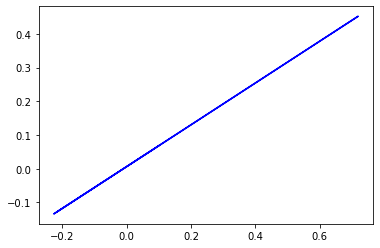

In [33]:
plt.plot(x_train,reg.predict(x_train),color = 'blue')

Text(0, 0.5, 'price')

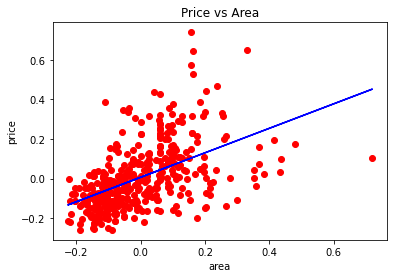

In [40]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'blue')
plt.title('Price vs Area')
plt.xlabel('area')
plt.ylabel('price')

In [41]:
#predicting with new value
x_new=np.array([[7300],[6800],[5300],[8400]])

In [42]:
reg.predict(x_new)

array([[4520.91893926],
       [4211.26738532],
       [3282.31272348],
       [5202.15235794]])

In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
#fiding mse
mse = mean_squared_error(y_test, reg.predict(x_test))
np.sqrt(mse)

0.12346564933022329

In [48]:
reg.score(x_test,y_test)

0.3145799614781555